# Lecture 3: Numpy and Pandas
## 3/6/2021

### Table Of Contents
1. [NumPy](#section1)  
    1.1 [Basic Operations](#section1.1)  
    1.2 [Broadcasting](#section1.2)  
    1.3 [Aggregation and Axes](#section1.3)  
    1.4 [Conditions](#section1.4)  
    1.5 [Useful NumPy Functions](#section1.5)  
    1.6 [Exercises](#section1.6)  
    1.7 [Final Notes on NumPy](#section1.7)  
2. [Pandas](#section2)  
    2.1 [DataFrames](#section2.1)  
    2.2 [Indexing](#section2.2)  
    2.3 [Sorting](#section2.3)  
    2.4 [Grouping](#section2.4)  
    2.5 [Pivoting](#section2.5)



### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://susa.berkeley.edu). Authored by [Roland Chin](mailto:rond24933chn@berkeley.edu), [Ajay Raj](mailto:araj@berkeley.edu), and [Adish Jain](mailto:adish.jain@berkeley.edu). 

### Presented by Chinmay Gharpure, Matt Moon, Minh Phan, Zoe Liu





<a id='section1'></a>
# NumPy

<img src="Images/numpy.jpg" alt="Drawing" style="width: 250px; height: 250px"/>

An introduction to your best friend in the realm of data science. Numpy is an optimized math library for Python. The code is vectorized as much as possible, which means that there's a heavy focus on using arrays (treated as n-dimensional vectors) to do operations. This is a shift away from doing looped operations.

For example:
If you wanted to compute the dot product of `[1, 2, 3, 4, 5]` and `[5, 4, 3, 2, 1]` = `[1*5, 2*4, 3*3, 4*2, 5*1]`, you could either loop through two **lists** in Python

```python
sum = 0
for v1, v2 in zip(arr1, arr2): # iterates through the lists at the same time
    sum += v1*v2
```

Or, you could perform all the multiplications at once, and then add them together. That's basically what NumPy does behind the scenes. So doing the dot product in NumPy is very simple:

```python
dot_product = arr1.dot(arr2)
```

Before we begin, vectors are single dimensional matrices, and a matrix is multidimensional. In Numpy, we represent both with np.arrays. We can also use np.matrix, but arrays are faster performance wise, and matrices are less easily manipulated and are inherently 2 dimensional.

<img src="Images/vm.png" alt="Drawing" style="width: 350px"/>

<a id='section1.1'></a>
## Basic Operations

In [ ]:
import numpy as np

NumPy is a Python library that is used to handle linear algebra operations. It does a couple amazing things under the hood that make certain operations lightning fast, and makes large scale data processing like Pandas possible (covered later).

First off, NumPy holds data in **arrays**.

In [ ]:
v = np.array([1, 2, 3, 4, 5]) #creating an array
v

Here's a quick review of indexing into lists. You can **index** an element of an array by putting it's index number in brackets after the name of the array.

Note: the index of arrays start with **0**, as with Python lists.

<div style="text-align: center">
    <video controls src="./Images/Denero.mov" alt="Denero" style="width: 200px; height: 300px"/>
</div>

In [ ]:
v[2]

In [ ]:
v[5] #why does this error?

**Exercise**: How would you sum the 3rd and 4th element of v?

In [ ]:
summed = ...
summed

### Indexing 2-D Arrays in Numpy

What is a 2-D array? It's an array of arrays, aka a matrix. 

This is what a 2D list looks like in vanilla Python.
```python
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    ]
```

However, accessing the number 5 is not that easy. There is no built-in way to index 2 layers deep into a list. So you have to index into multiple arrays one at a time as follows:

```python
# getting the number 6 from A
# A[1] = [4, 5, 6]
# A[1][2] = 6
six = A[1][2]
```

When you store an array as an np.array, you are not only gaining a runtime speedup, you're also getting a speedup in writing your code because you now have advanced indexing!

Now, we'll show how to index in a similar array in numpy's array format. You can find more info in greater detail [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

<a id='section1.1.2'></a>
### Subarrays and Submatrices

_`np.random.randn` takes in 2 arguments, where the 1st argument is the number of rows and the 2nd argument is the number of columns. It creates a matrix of those dimensions with random numbers from the standard normal distribution._

In [ ]:
random = np.random.randn(3, 4)
random

Let's multiply all its values by 10 so it's easier to read.

In [ ]:
bigger_random = random * 10
bigger_random

That's better, but there's still a lot of decimals. Let's go 1 step further and round all the values with the astype function, which casts an object to a specified type. Here it'll round all the values in the array to the nearest integer.

This is an example of how easy it is to apply a function to every element in a matrix.

_`astype` takes in 1 argument, determining what to convert an object to._

In [ ]:
A = bigger_random.astype(int)
A

Now let's select the element in row index 2, column index 2.

In [ ]:
A[2, 2]

<img src="Images/matrix.PNG" alt="Drawing" style="width: 250px; height: 200px"/>

You can also use the slice operation, which is a colon ```[start:end]``` that allows you to select multiple elements. 
For example:

```[1:5]``` is equivalent to "from element index 1 to 4" (Python doesn't include the last index)

```[1:]``` is equivalent to "from element index 1 to all the way to the end"

```[0:]``` is equivalent to ```[:]```, which makes a copy

Omitting the first index defaults to the beginning (0), and leaving the second index blank defaults to the end (the length of whatever is being sliced).

In a 2D array, since there's rows and columns, there are 2 slice operators, the first of which will take a start index for the row and an end index, while the second one will take a start index for the column and an end index: ```[row start:row end, column start:column end]```.

Again, remember that indexing begins at 0.

In [ ]:
A

In [ ]:
A[1, :] # this will return the 2nd row of the matrix, along with all it's column elements from 0 to 3

In [ ]:
A[:, 2] # this will return the 3rd column of the matrix, along with all it's row elements from 0 to 3

This is how you get the 2x3 matrix at the bottom right hand corner of the matrix.

In [ ]:
A[1:, 1:]

**Exercise:** What if you wanted the 3x3 matrix at the left of A (everything but the rightmost column)?

In [ ]:
far_left = A[:3, :3]
far_left

**Negative indexing** can also be performed in Numpy. This is useful when you don't know the length of the array, and want something starting from the end. The last element has an index of -1, second to last element has an index of -2, and so forth. The same operations from above can be used.

Here's an example with a 1D array.

_`np.arange` takes in up to 3 arguments, a starting number, end, and a step interval._

In [ ]:
D = np.arange(1, 35, 3)
D

In [ ]:
D[-3]

In [ ]:
D[2:-3] #remember, the index stops 1 before the last, so the last element is at index -3 - 1 = -4

**Exercise:** Let's try to select the 2x2 matrix at the bottom righthand corner of the A matrix from the last exercise.

Hint: leaving the 2nd argument blank in both slices below tells it to run all the way to the end.

In [ ]:
A

In [ ]:
bottom_right_corner = ...
bottom_right_corner

This is how you'd do it with positive indices.


In [ ]:
A[1:, 2:]

_`shape` takes an array and returns the dimensions of it; it can be useful to tell how many elements there are in a matrix._

In [ ]:
#(rows, columns)
A.shape

**Extra:** _```reshape``` takes in 2 arguments, and change an array into the specified dimensions._

Observe that it fills the array row by row by going along the rows of the original matrix.

In [ ]:
A.reshape((2, 6))

In [ ]:
A.reshape((6, 2))

You can also use `reshape` with `-1`. The value of the resulting array is inferred from the length of the array and remaining dimensions.

Let's let `a` be the following matrix and call reshape with -1 as the 2nd argument. Numpy will see that we want 3 rows, and infer the rest.

In [ ]:
a = np.array([[1,2,3], [4,5,6]])
a

In [ ]:
a.reshape(3, -1)

If you give it no `x` argument, it sees that you want 1 row, and makes the resulting dimensions be compatible with the original.

In [ ]:
np.reshape(a, (-1))

And if you specify `1` as the `y` argument, it sees that you want 1 column.

In [ ]:
np.reshape(a, (-1, 1))

<a id='section1.2'></a>
## Broadcasting

The most important thing NumPy does is **broadcasting**, which means that it allows for arithmetic operations on arrays of different shapes.

It's important because because uses less memory and is more computationally efficient. This is because broadcasting allows less memory to be moved around during the multiplication (in the example below, b is a scalar vs an array).

More information can be found [here](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

Here's an example of array multiplication, where both arrays' sizes are equal.

In [ ]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

Broadcasting is being used here, as the scalar ```b``` is being "stretched" into an array with the same shape as ```a```.

In [ ]:
b = np.array([1.0, 2.0, 3.0])
a = 2.0
a * b

This usually eliminates the need for `for` loops! Apart from it removing the need to store redundant info, it also makes your code easier to read.

In [ ]:
b

In [ ]:
b ** 2

In [ ]:
b + 42

The rule of thumb is that NumPy does arithmetic operations pairwise, but if a certain dimension is 1, then it will **broadcast** that effect across the dimension. Broadcasting is when a smaller array is "repeated" across a larger array so they have compatible shapes, and arithmetic can be done between them.

Here's a more complicated example.

In [ ]:
b # 1x3 matrix

_`np.zeros` takes in 2 numbers, and makes a matrix of the specified dimesions filled with 0's._

In [ ]:
a = np.zeros((3,3))
a

In [ ]:
a + b

The way this works is that we are adding the `b` row vector to every row of the matrix `a`. In effect, "stretching" `b` across `a`.

<img src="Images/broadcasting.JPG" alt="Drawing" style="width: 300px, height: 350px"/>

You can also add a single number to every element of an array like this.

In [ ]:
a

In [ ]:
3 + a

**Exercise:** What if we want to add a constant vector to each row of a matrix? In the following example, the sizes of the arrays are different, so the sum is performed elementwise. We want to create a `vector` that when added to `an_array`, returns the `given` matrix.

In [ ]:
given = np.array([[2, 2, 4], [5, 5, 7], [8, 8, 10]])
given

In [ ]:
an_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
an_array


In [ ]:
vector = ...
the_sum = an_array + vector
the_sum #does this look like the given matrix?

<a id='section1.3'></a>
## Aggregation and Axes

NumPy is also great at **aggregation**, which means combining values along rows or columns in arrays or matrices.

In [ ]:
big_matrix = np.arange(16).reshape((4, 4)) #this creates an array from 0 to 15, and then reshapes it into a 4x4 matrix
big_matrix

In [ ]:
big_matrix.sum() # sums all of the elements in an array/matrix

The `axis` parameter is commonly used in NumPy. It's a little hard to think about, so here's a picture.

<img src="Images/axes.JPG" alt="Drawing" style="width: 400px"/>

When you pass in `axis=0`, that means that you want to do your operation over the columns, and `axis=1` means over the rows.

Let's go back to our `big_matrix`.

But now instead of the total sum of all the elements, we want to calculate all of the sums of each rows, or row-sums.

In [ ]:
big_matrix

In [ ]:
big_matrix.sum(axis=1)

The column-sums are similarly computed.

In [ ]:
big_matrix.sum(axis=0)

Other functions such as `np.mean` also have axis arguments.

In [ ]:
big_matrix.mean(axis=1)

In [ ]:
big_matrix.mean(axis=0)

**Exercise:** Let's try an example with another 2D matrix. Uncomment A (delete the #) and erase the underscore blanks, filling in numbers to make the sum over axis 0 output equal to ```[3, 12, 8]```.

In [ ]:
# A = [[2, _, 5], [_, 9, _]]

In [ ]:
np.sum(A, axis=0) #test your values by running this and seeing if it equals an array of [3, 12, 8]

Here are some other aggregation functions you might see.

In [ ]:
a = np.random.rand(100) #randomly creating 100 numbers from the standard normal distribution

In [ ]:
a.mean() #finds the mean of an array of numbers

In [ ]:
np.median(a) #finds the median of an array of numbers

<a id='section1.4'></a>
## Conditions

Now we're going to see how we can select certain elements based on conditions that we specify. Sometimes you don't want all the rows and columns from a matrix you're given. For example, say we have the following array of numbers, and we want the first and last number.

In [ ]:
random_array = np.arange(3, 13, 2)
random_array

One way to do this is to use boolean indexing, where you put a `True` for the ones you want, and a `False` for the ones you don't, like this:

In [ ]:
random_array[[True, False, False, False, True]]

But that isn't always feasible. Let's look at another example, where we have the first 25 Fibonacci numbers.

<img src="Images/fibo.PNG" alt="Drawing" style="width: 400px"/>

In [ ]:
# This code generates the first 25 elements of the Fibonacci sequence (a series of
# numbers in which each number is the sum of the two preceding numbers)
# It's a cool exercise to figure out how this works, try it out at home!

A = np.array([
    [1, 1],
    [1, 0]
])

fib = np.zeros(25)

start = np.array([1, 0])
curr_A = A

fib[0] = 0
fib[1] = 1

for i in np.arange(2, 25):
    fib[i] = (curr_A @ start)[0]
    curr_A = A @ curr_A

fib = fib.astype(int)
fib

Similar to above, we can select elements based on conditions that we specify. Let's say you only want the even elements from the fib array from above.

In [ ]:
fib[[True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True]]

But this requires you to manually look through for the ones you want, and this can take a long time. How can we tell if a number is even? Let's see what the 2 operations below yield.

In [ ]:
4 % 2, 3 % 2 # 4 is even, 3 is not

It turns out, the modulo operator gives the remainder when x is divided by y. We can similarly apply the modulo operator to an array, like so:

In [ ]:
fib % 2 == 0

Now just use the boolean array to select which ones you want!

In [ ]:
fib[fib % 2 == 0]

Notice how we we're able to just put the name of the array instead of having to loop through each index of the array! This is another beautiful aspect of NumPy.

We can also make logical expressions with the `&`, `|`, `~` operators.

In [ ]:
fib[~(fib % 2 == 0)] # ~ is negation, so here we have the odd numbers

In [ ]:
fib[(fib % 2 == 0) & (fib % 3 == 0)] #here we have numbers that are both even and divisible by 3

**Exercise:** Let's try an example on our own. The code below randomly generates a 3x3 matrix. What if we only want the numbers that are less than the mean of all the elements of the matrix?

In [ ]:
random_matrix = np.random.rand(3, 3)
random_matrix

In [85]:
below_avg = ...

<a id='section1.5'></a>
## Useful NumPy Functions

Before you start writing complex code in NumPy, be sure to do a Google Search! Most likely there is a NumPy function already there for you.

Press `shift`-`tab` after placing your cursor after each function name to get a helpful message of what it does!

In [ ]:
np.arange(10)

In [ ]:
np.ones((4, 4)) #takes in a tuple specifying the number of rows and columns

In [ ]:
np.zeros((5, 5))

In [ ]:
np.eye(5)

In [ ]:
np.dot(np.array([1,2]), np.array([3,4]))

In [ ]:
np.full((2,2),7) 

<a id='section1.6'></a>
## Exercises
Try these on your own for extra practice.

### Indexing & Axis

**Exercise:** Given the `rounded_matrix` below, first retrieve only the first 3 columns; name this `halved_matrix`. Then sum the `halved_matrix` row wise.

In [ ]:
big_matrix = np.random.randn(4, 6)
bigger_matrix = big_matrix * 10
rounded_matrix = bigger_matrix.astype(int)
rounded_matrix

In [ ]:
halved_matrix = """YOUR CODE HERE"""
halved_matrix

In [ ]:
row_sums = """YOUR CODE HERE"""
row_sums

<a id='section1.7.1'></a>
### Broadcasting

**Exercise:** Uncomment the x and fill in the 2 blanks so that x + y = z.

In [ ]:
# x = np.array([_, _])
y = np.array([[3], [4]])
z = np.array([[4, 5], [5, 6]])
#Hint: y looks like [3] and z looks like [4, 5]
#                   [4]                  [5, 6]
#The row vector will be "stretched" across and added to both elements of the column vector y.

In [ ]:
x + y

### Conditioning

We have 2 arrays, an array `x` consisting of some numbers and an array `y` consisting of letters that correspond to each number.

In [ ]:
x = np.array([-3, 1, 4, -9, 6, 4, 6, -2, -3, 5, 3, -5, 21, -3, 2, 1, -2, 3, 4, -3, 1, -2, -1])
x

In [ ]:
y = np.array(['s','e','f','u','z','r','i','s','a','e','s','i','p','s','e','s','c','w','c','o','m','o','l'])
y

Let's say we only want the letters whose corresponding numbers are negative. How would we do that?

Hint: use ```x``` to make a boolean array to index into ```y```.

In [ ]:
"""YOUR CODE HERE"""

In [ ]:
help(np.arange)

<a id='section1.7'></a>
## Final Notes on NumPy

Numpy makes scientific computing in Python possible.

Also, remember that whenever you're confused with or forget what parameters a numpy function takes, say with ```np.arange```, you can call ```help(np.arange) ``` in an empty cell.

<a id='section2'></a>
# An Introduction to Pandas and Data Processing

<img src="Images/pandas.PNG" alt="Drawing" style="width: 400px"/>

In [90]:
import pandas as pd

Well, we know we can store numbers in matrices in NumPy. But, this isn't great: compare and contrast with Microsoft Excel. NumPy seems like Excel without any of it's nice aesthetic features, like plotting graphs, etc. **Pandas** is Python's answer to this.   

**NOTE:** today, we will only be going through a handful of useful Pandas functions. To explore all of Pandas functionality more in-depth, see the full documentation here: https://pandas.pydata.org/pandas-docs/stable/

Today, we'll be diving into the **Titanic** dataset, which has the data for every passenger aboard the Titanic. We've downloaded two .csv files for you to play with in Pandas.

A Microsoft Excel file is the same as a **Comma-Separated-Value** (.csv) file: where each of the rows is it's own line, separated by commas.

Pandas allows you to convert a .csv file into a Pandas object in the following way.

## DataFrames

<img src="Images/matrix_df.png" alt="Drawing" style="width: 600px; height: 150px"/>

In [91]:
titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

Data is stored in **DataFrame** objects.

In [92]:
type(titanic_train)

pandas.core.frame.DataFrame

First, let's look at the data itself, using the `head` function.

In [93]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Each of the columns is a **Series** object, and you can get each of them by indexing the same way as you would a **dictionary** in Python (in brackets).

In [94]:
type(titanic_train['Name'])

pandas.core.series.Series

You can use the `head` function on **Series** too.

In [95]:
titanic_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Let's get back to the data.

In [96]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


You'll notice that there is a bolded column and a bolded row: these are the **index column** (which uniquely defines rows) and the **column names**.

You can get any specific value in the **DataFrame** with the `loc` function. More about accessing table values can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

`loc` selects rows or columns given particular labels, whereas 
`iloc` selects rows or columns given the actual integer indices.

## Indexing & Slicing

In [97]:
titanic_train.loc[2, 'Name'] # gets the name of the passenger with index 2

'Heikkinen, Miss. Laina'

The **Index** is like a special column in our dataframe that we use to uniquely identify our rows. Anything can be an index as long as each row has a unique value in this column.
Now, since each row represents a person aboard, it would make sense that `PassengerId` can be a valid index. It also makes more sense with our `.loc` function calls, e.g. to be getting the name of a `PassengerId`.

We accomplish this with the `.set_index` command.

In [98]:
titanic_train = titanic_train.set_index('PassengerId')

In [99]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Congratulations, you are now data scientists! You just did one step of what is known as **exploratory data analysis (EDA)**.

Now, let's look under the hood. Every Pandas **DataFrame** is just a NumPy matrix.

In [105]:
titanic_matrix = titanic_train.values
print(type(titanic_matrix))
titanic_matrix


<class 'numpy.ndarray'>


array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

In [106]:
titanic_matrix[0]

array([0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171',
       7.25, nan, 'S'], dtype=object)

We can accomplish most of what we can in NumPy in Pandas also. For example, we can index **DataFrame** with the `.iloc` command.
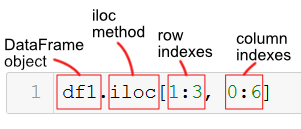

In [107]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
titanic_train.iloc[3, 3] # 4th row, 4th column ==> sex of 4th passenger.

'female'

We can use iloc to grab multiple rows and columns too. Instead of indexing, this is called **slicing** our dataframe:  
`df.iloc[s_row_idx:e_row_idx, s_col_idx:e_col_idx]`.

In [109]:
titanic_train.iloc[3:5, 2:5] #2nd, 3rd, 4th columns of the 3rd and 4th rows (zero-indexed and non-inclusive of high-idx)

,Name,Sex,Age
PassengerId,,,
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,"Allen, Mr. William Henry",male,35.0


**Exercise:** What do you think the code below will do?

Your answer:

In [110]:
##uncomment the line below to see!
#titanic_train.iloc[:, 2:5].head()

## Applying functions


We can call a function on elements of one of our **Series** objects through the use of the .apply function.

For **DataFrames** you can even specify if you want to apply it to the columns or rows.

In [113]:
titanic_train.apply(len, axis = 0)

Survived    891
Pclass      891
Name        891
Sex         891
Age         891
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       891
Embarked    891
dtype: int64

In [117]:
titanic_train['Name'].apply(len)

PassengerId
1      23
2      51
3      22
4      44
5      24
       ..
887    21
888    28
889    40
890    21
891    19
Name: Name, Length: 891, dtype: int64

## Filtering & Sorting

We can use conditionals to index into our dataframe too. This will return a new dataframe, containing only the rows which meet the condition. This is called **filtering** your dataframe. 

In [ ]:
survived = titanic_train[titanic_train['Survived'] == 1] # all passengers that survived.
survived.head()

Under the hood, you can think of filtering as **boolean indexing** into your dataframe. What does that mean? Well, `titanic_train['Survived'] == 1` actually creates a Boolean array of `True` and `False` values - one for each row in the dataframe, indicating whether the `Survived` column was 1 or not in that row. We then use that array of `True` and `False` values as our way to index into the dataframe, grabbing only the rows which have a `True` associated with them. You can see this here:

In [ ]:
arr = titanic_train['Survived'] == 1 #boolean array
print(arr[0:5])

In [ ]:
titanic_train['Age'].sum() / titanic_train['Age'].dropna().shape[0] # the average age of someone aboard.

**Exercise**: Find the total fare spent by females aboard the Titanic.

In [86]:
fare = ...
fare

Ellipsis

**Sorting** is also very useful when dealing with large amounts of data. For example, what if we wanted to sort our titanic dataframe to show us who spent the most on their ticket first. This would require us to sort the `Fare` column of the dataframe.

In [ ]:
titanic_train.sort_values("Fare", ascending=False).head()

Notice, we have to use `ascending=False` here to make sure the data goes from highest to lowest instead of the other way. Had we wanted it the other way, we should have set `ascending=True` (this is the default when sorting).

## Grouping & Aggregate Functions

What if we wanted to compare males and females on the titanic? Here, we have two **groups**, which we want to consider separately. We can use the `groupby` function to achieve this.

In [ ]:
titanic_train.groupby("Sex") #returns a DataFrameGroupBy Object

Notice that using the `groupby` function alone just returns a `DataFrameGroupBy` object. How do we actually make use of this? We have to use something called an **aggregate function** on the returned object.

Here just some of the aggregate functions we can call from the returned object:
1. .count()
2. .mean()
3. .median()
4. .sum()
5. .max()
6. .min()

Special note: .agg(func) is the general form that works for any function you pass in.

In [ ]:
titanic_train.groupby("Sex").count()

Notice that in this new dataframe, the `sex` column we grouped on is now the **index** of our dataframe. 

What's exactly happening here? We're basically separating our dataframe: you can think of all the rows being separated into `male` and `female` groups. Then, to all the rows within each of those groups, we are applying our aggregate function. 

**Exercise:** Find the mean age of males and females on the titanic.

In [87]:
mean_age = ...

It's also possible to group on multiple columns. Say we wanted to find the max age of males and females that both survived and didn't survive. How could we do that?

In [ ]:
titanic_train.groupby(["Sex", "Survived"]).sum()

Now, you see that we've grouped by **two** columns, and therefore have two indices for our dataframe. 

## Pivoting (Extra)

Sometimes, we want to display the cross-classification of two categorical variables in a different kind of table to make it easier to read. One function that helps us do this is the `pd.pivot_table` function.

In the previous example, we grouped our Titanic dataset by both `Sex` and `Survived`.

What if we wanted to find the age of the oldest man who survived the Titanic? We can find that by looking at row `1` under `male` and see that it is 80. However, if we had used a pivot table, then we would have gotten a table like the one below.

In [ ]:
pd.pivot_table(titanic_train,
               index='Sex',         # Index for rows
               columns='Survived',        # Columns
               values='Age',        # Values in table
               aggfunc=max) # Aggregation function

In this table, it is much easier to find the age of the oldest man to survive. We just look at the intersection of the row `male` and the column `1`. 

Note that the `aggfunc` argument in `pd.pivot_table` takes in the same type of functions as the aggregation functions we use for grouping tables. 

Now let's say we wanted to find the cross-classification of the sex of passengers and whether they survived. If we use the `len` aggregation function, then we can find how many people of each gender survived or didn't survive. 

In [ ]:
pd.pivot_table(titanic_train,
               index='Sex',         # Index for rows
               columns='Survived',        # Columns
               values='Age',        # Values in table
               aggfunc= len) # Aggregation function

**Excercise**: Find the average age of passengers who did/didn't survive for each ticket class.

In [ ]:
"""YOUR CODE HERE"""

# Conclusion

Today, you've worked with matrices and vectors, which are crucial to understanding machine learning models, and you've dealt with real data that you can analyze in Python. You're all on your way to becoming real data scientists.